In [73]:
import numpy as np
import pandas as pd
import scanpy as sc
import palettable

In [418]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.5.post1 anndata==0.7rc2 umap==0.3.10 numpy==1.16.2 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1


In [378]:
filename = 'figures/Fig5/RNASeq_ReadCount.txt'
adata = sc.read_csv(filename,delimiter=' ').transpose()

In [379]:
label_list = [1,1,1,1,1,1,
             2,2,2,2,2,
             3,3,3,3]

In [380]:
adata.obs['label'] = np.array(label_list).astype('str')
adata.obs['label'] = adata.obs['label'].astype('category')

In [381]:
adata.obs['celltype'] = adata.obs['label'].copy() 

In [382]:
# Neighbor:1
# Distant:2
# Fibrosis:3
new_cluster_names = ['Neighbor','Distant','Fibrosis']
adata.rename_categories('celltype', new_cluster_names)

In [383]:
adata = adata[:,key_genes]

normalizing counts per cell
    finished (0:00:00)


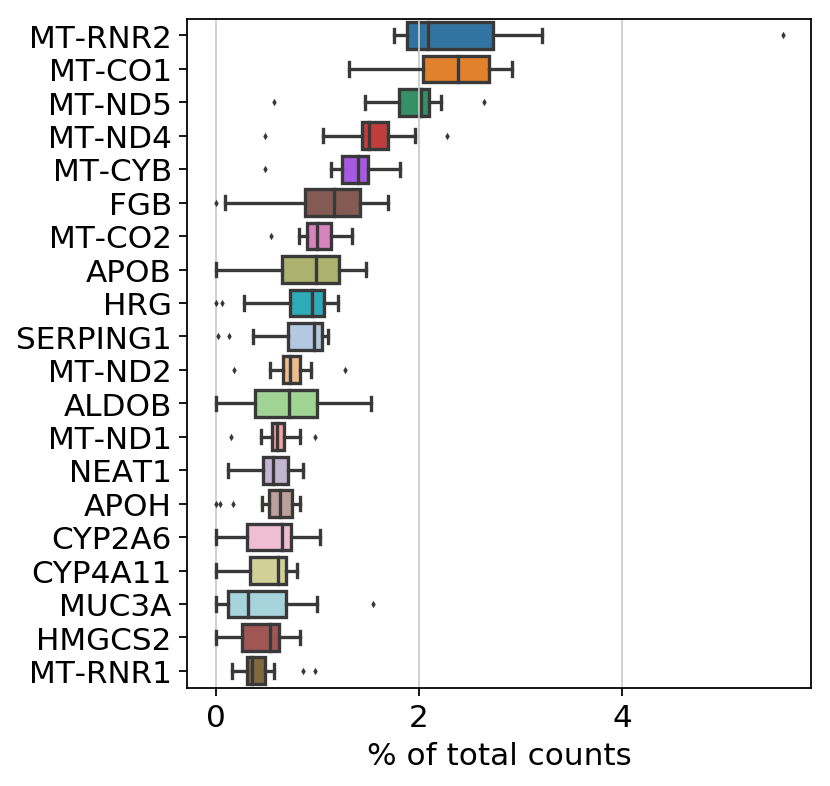

In [21]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [27]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)

In [25]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

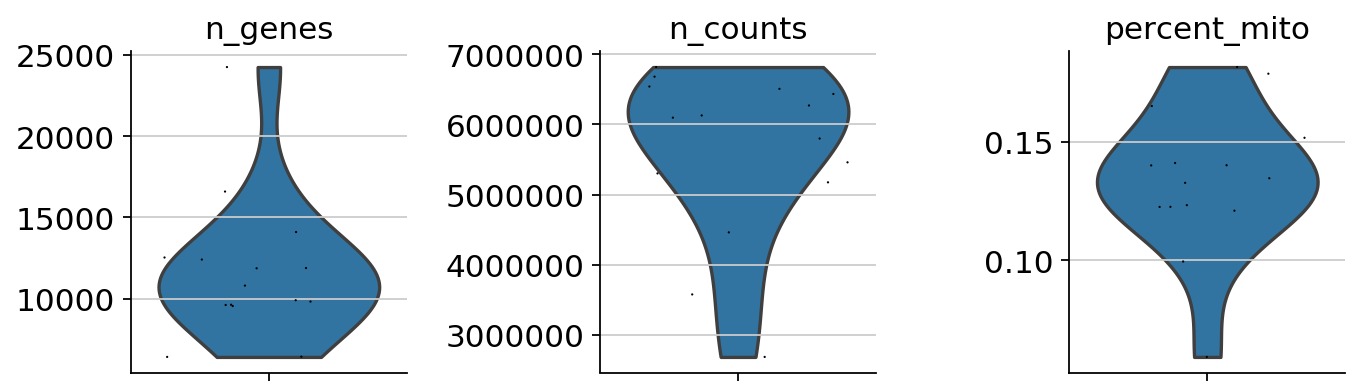

In [29]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

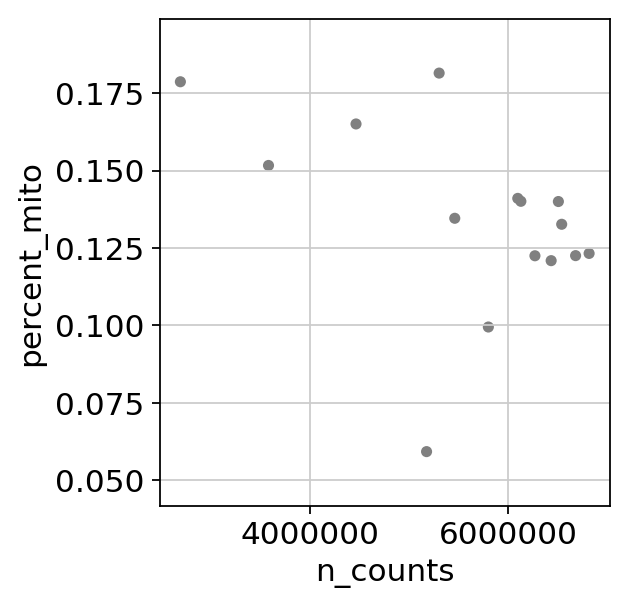

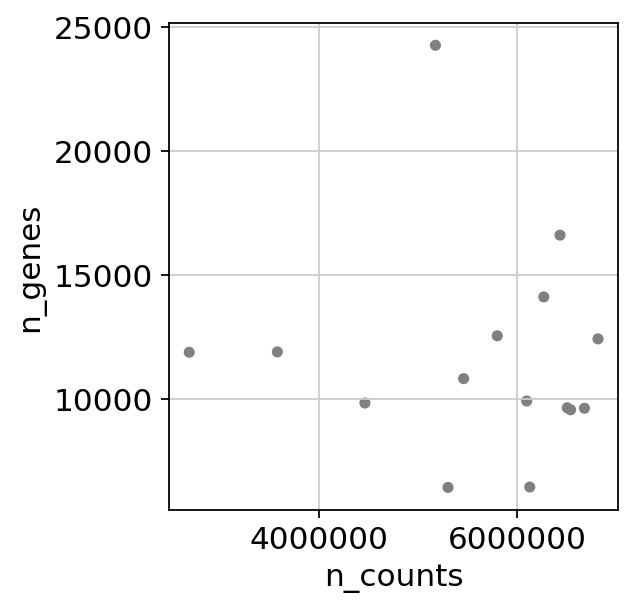

In [33]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito',size=100)
sc.pl.scatter(adata, x='n_counts', y='n_genes',size=100)

In [215]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
filtered out 4408 genes that are detected in less than 1 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:00)


In [384]:
sc.pp.normalize_total(adata)

normalizing counts per cell
    finished (0:00:00)


In [385]:
sc.pp.log1p(adata)

/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:298: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


In [37]:
adata.raw = adata

In [38]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


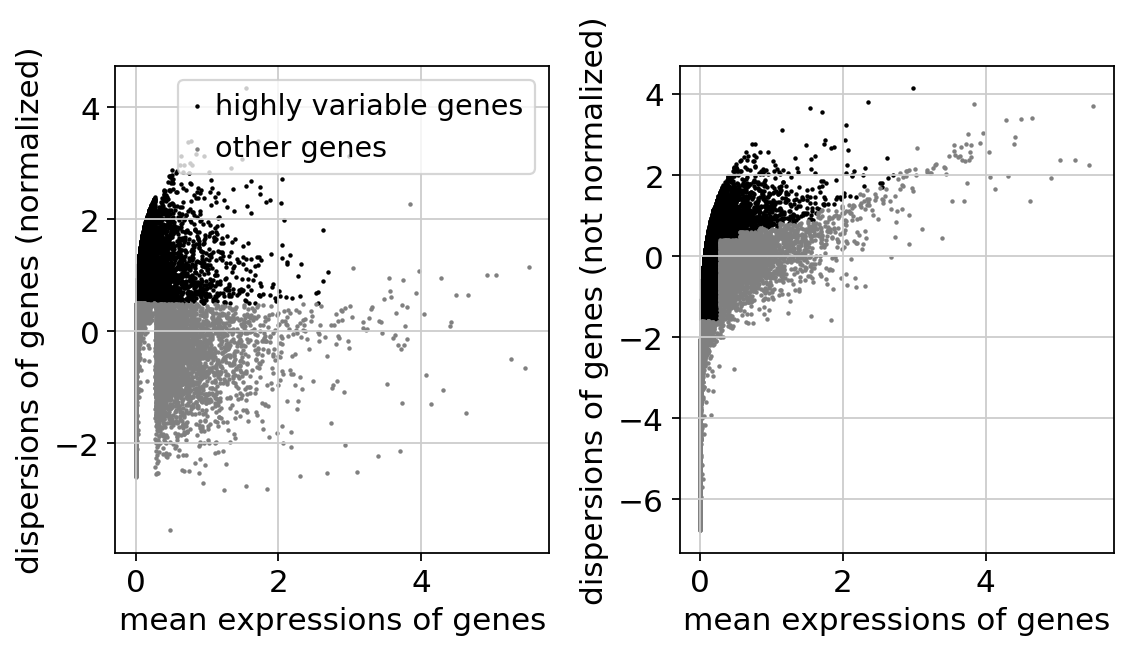

In [39]:
sc.pl.highly_variable_genes(adata)

In [41]:
adata = adata[:, adata.var.highly_variable]

In [43]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']


/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/anndata/_core/anndata.py:1118: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning,


    finished (0:00:19)


In [371]:
sc.pp.scale(adata)

/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [427]:
%matplotlib inline

In [386]:
sc.tl.pca(adata,n_comps=10)

computing PCA with n_comps = 10
    finished (0:00:00)


In [402]:
cls_cmp_ori = palettable.colorbrewer.qualitative.Set1_3.mpl_colors
cls_cmp = cls_cmp_ori.copy()
cls_cmp[0] = cls_cmp_ori[0]
cls_cmp[1] = cls_cmp_ori[2]
cls_cmp[2] = cls_cmp_ori[1]


In [410]:
cls_cmp=["#4DBBD5FF", "#00A087FF", "#E64B35FF"]

In [411]:
adata.uns['celltype_colors'] = cls_cmp

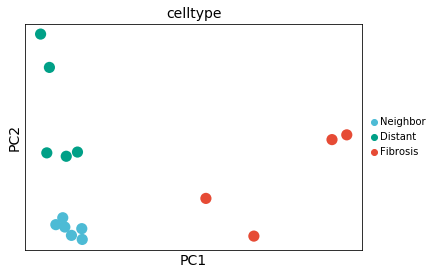

In [428]:

sc.pl.pca(adata, color=['celltype'],size=500,projection='2d',legend_fontsize=10)

In [317]:
sc.tl.paga(adata,groups='celltype')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


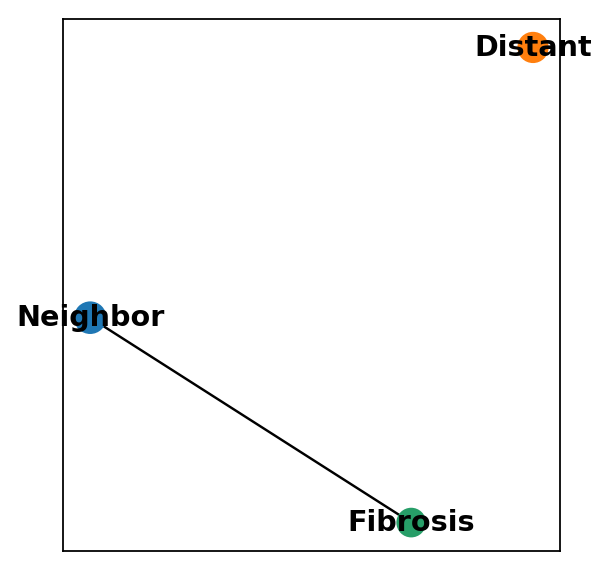

In [318]:
sc.pl.paga(adata)

In [144]:
label_f = [1,2,1,1,1,2,
          2,2,1,1,2,
          3,3,3,3]

In [153]:
adata.obs['region_type'] = np.array(label_f).astype('str')
adata.obs['region_type'] = adata.obs['region_type'].astype('category')

In [131]:
adata.obsm['X_pca']

array([[-18.821568 , -36.823242 ],
       [-24.62371  , -18.512957 ],
       [-10.8339615, -62.631504 ],
       [ -5.2932615, -66.52535  ],
       [-23.932579 , -24.00522  ],
       [-27.217632 ,  -8.66312  ],
       [-25.018002 , -19.151918 ],
       [-41.055687 ,   8.859335 ],
       [-28.467768 , -19.558292 ],
       [-28.509798 , -20.768599 ],
       [-42.481506 ,  12.967089 ],
       [-24.048086 ,  87.55416  ],
       [-20.232344 , 138.7845   ],
       [  2.6628926,  24.876596 ],
       [317.87323  ,   3.598428 ]], dtype=float32)

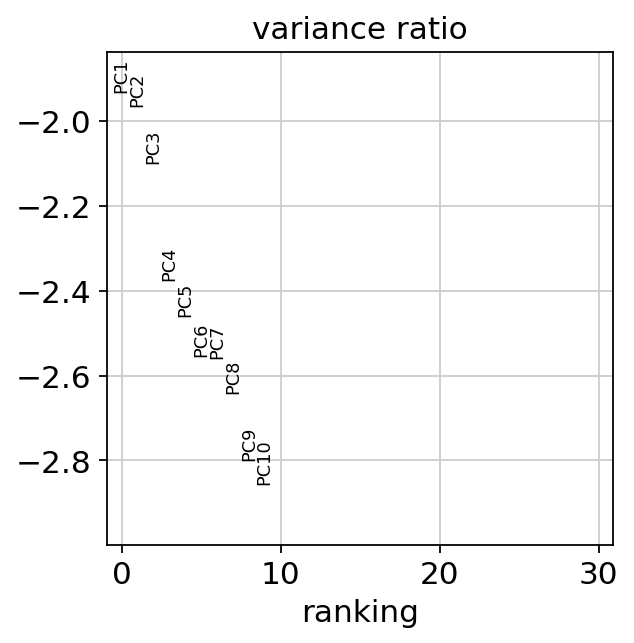

In [55]:
sc.pl.pca_variance_ratio(adata, log=True)

In [346]:
sc.pp.neighbors(adata, n_neighbors=3, n_pcs=2)

computing neighbors
    using 'X_pca' with n_pcs = 2
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)


In [347]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


In [350]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [ 1.          1.          1.          0.8824167   0.7016202  -0.17860506
     -0.29213575 -0.33918366 -0.4898438  -0.58335006 -0.63061786 -0.69097316
     -0.71851134 -0.72978127]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


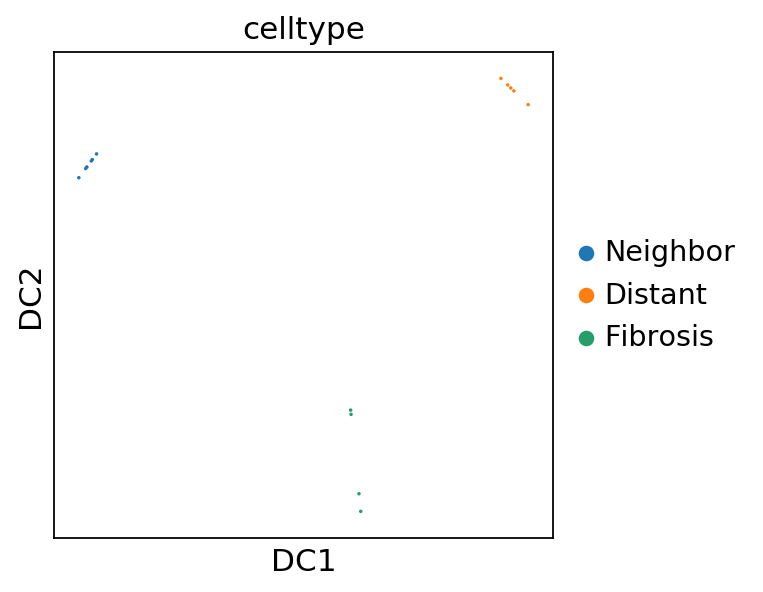

In [352]:
sc.pl.diffmap(adata,color=['celltype'],size=10)

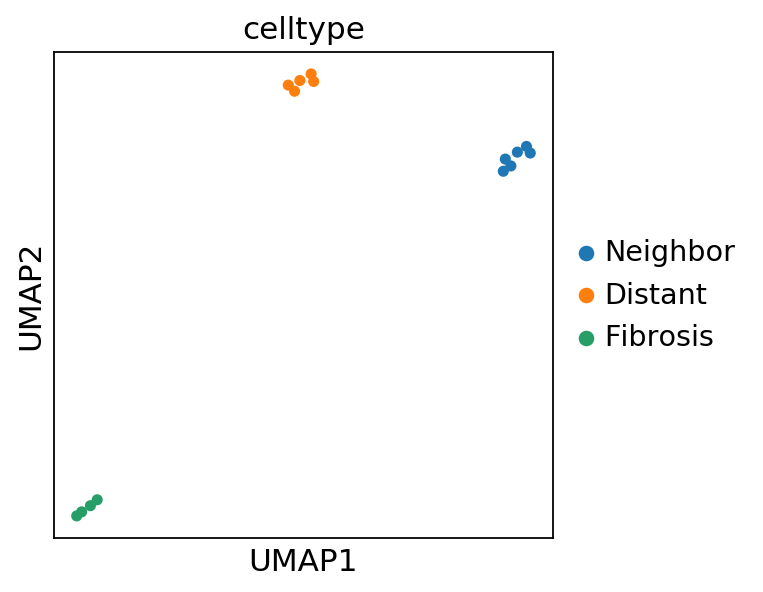

In [355]:
sc.pl.umap(adata,color=['celltype'],size=100,edges=True)

In [65]:
# adata.obs['celltype'] = adata.obs['label'].copy() 
adata.obs['celltype_false'] = adata.obs['label'].copy() 

In [63]:
# Neighbor:1
# Distant:2
# Fibrosis:3
new_cluster_names = ['Neighbor','Distant','Fibrosis']
adata.rename_categories('celltype', new_cluster_names)

In [66]:
new_cluster_names = ['Neighbor','Distant','Neigobor']
adata.rename_categories('celltype_false', new_cluster_names)

In [74]:
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap


In [71]:
sc.tl.rank_genes_groups(adata,groupby='celltype')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [235]:
gene_uns = list(adata.uns['rank_genes_groups']['names'])

In [335]:
top_n = 10000
key_genes = []
for gu in gene_uns[:top_n]:
    cur_li = list(gu)
    key_genes.extend(cur_li)

In [336]:
len(key_genes)

300

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: overflow encountered in expm1
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


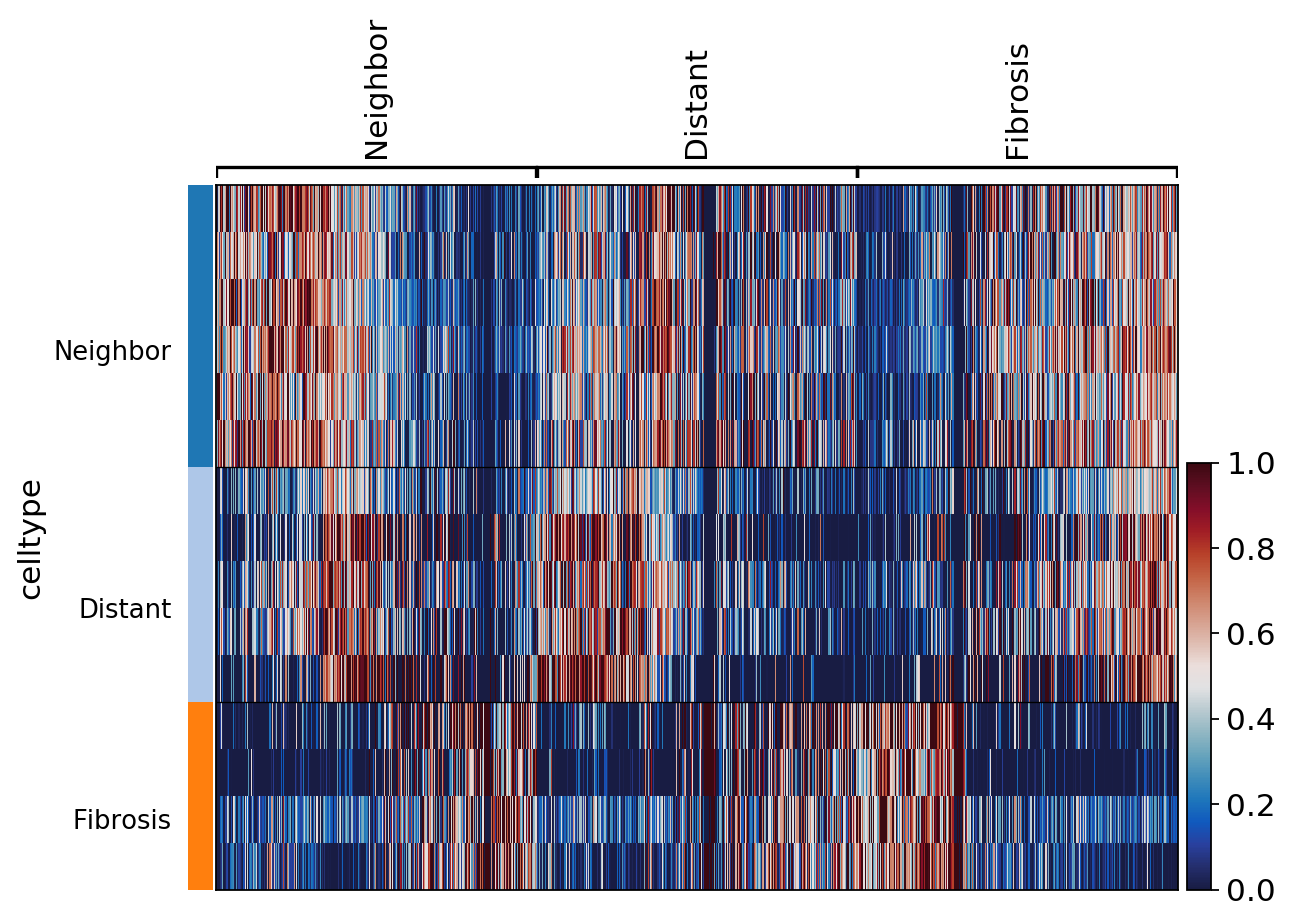

In [334]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='wilcoxon',n_genes=10000)
sc.pl.rank_genes_groups_heatmap(adata,n_genes=1000,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


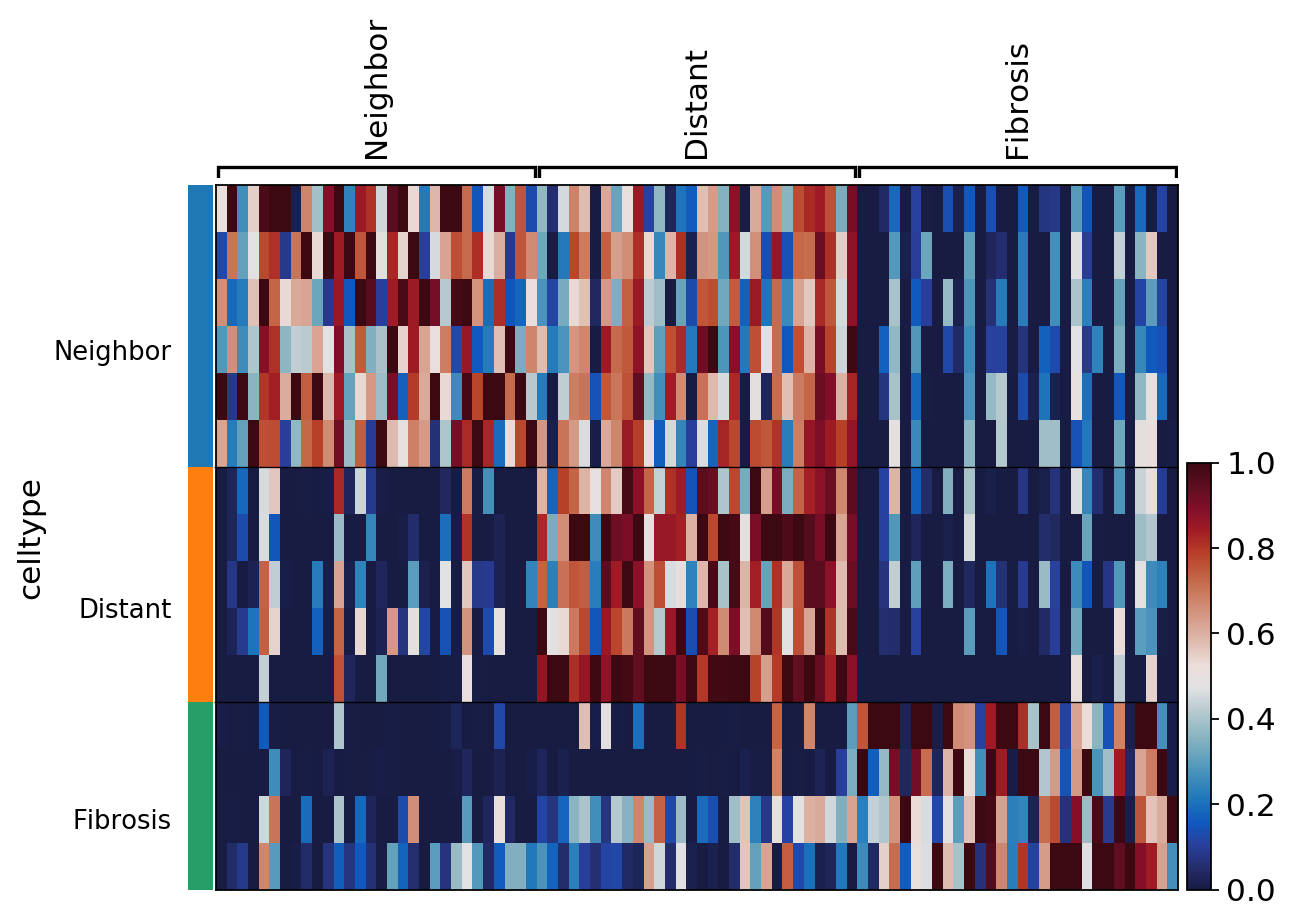

In [83]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='wilcoxon')
sc.pl.rank_genes_groups_heatmap(adata,n_genes=30,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:02)


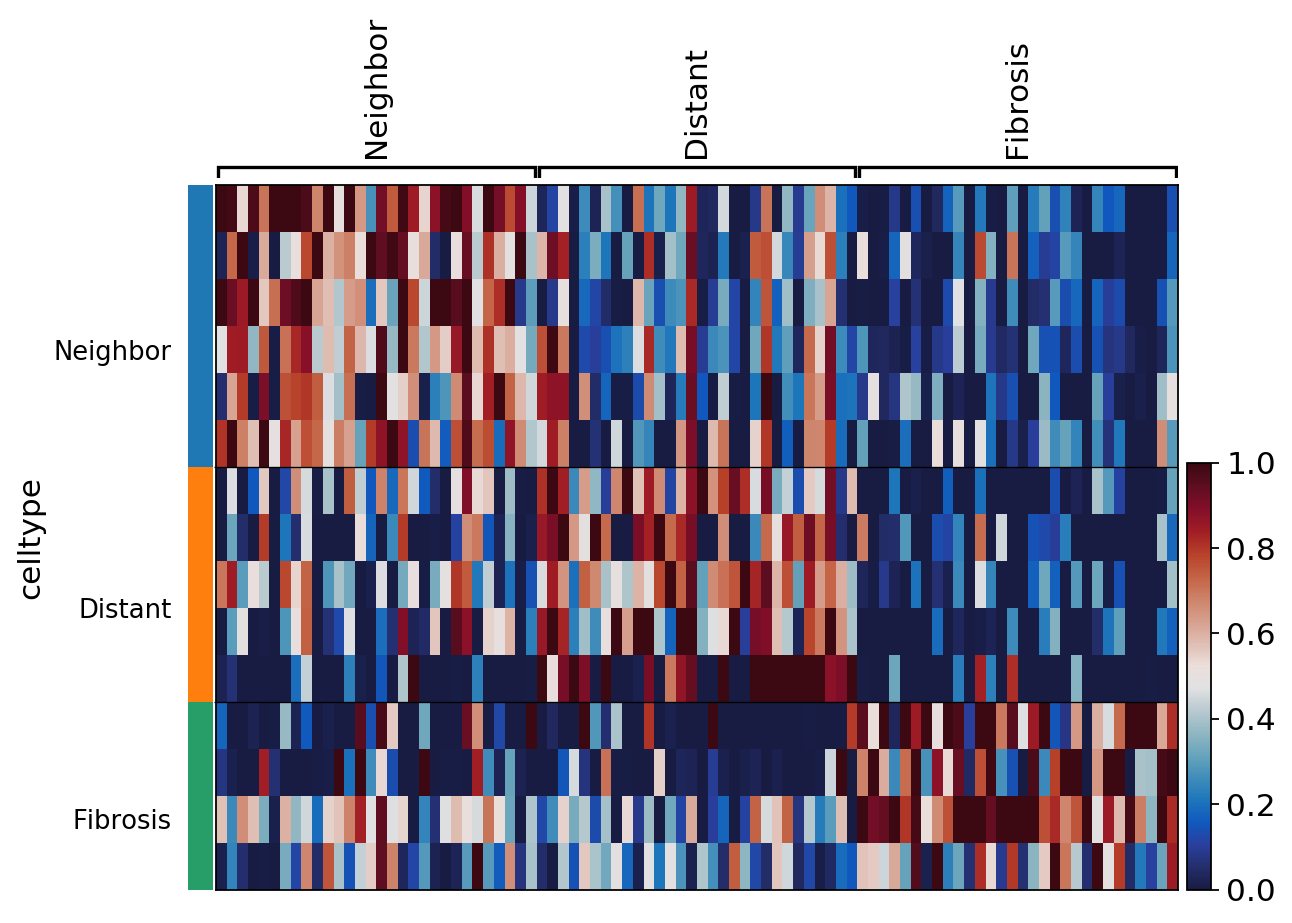

In [84]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='logreg')
sc.pl.rank_genes_groups_heatmap(adata,n_genes=30,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


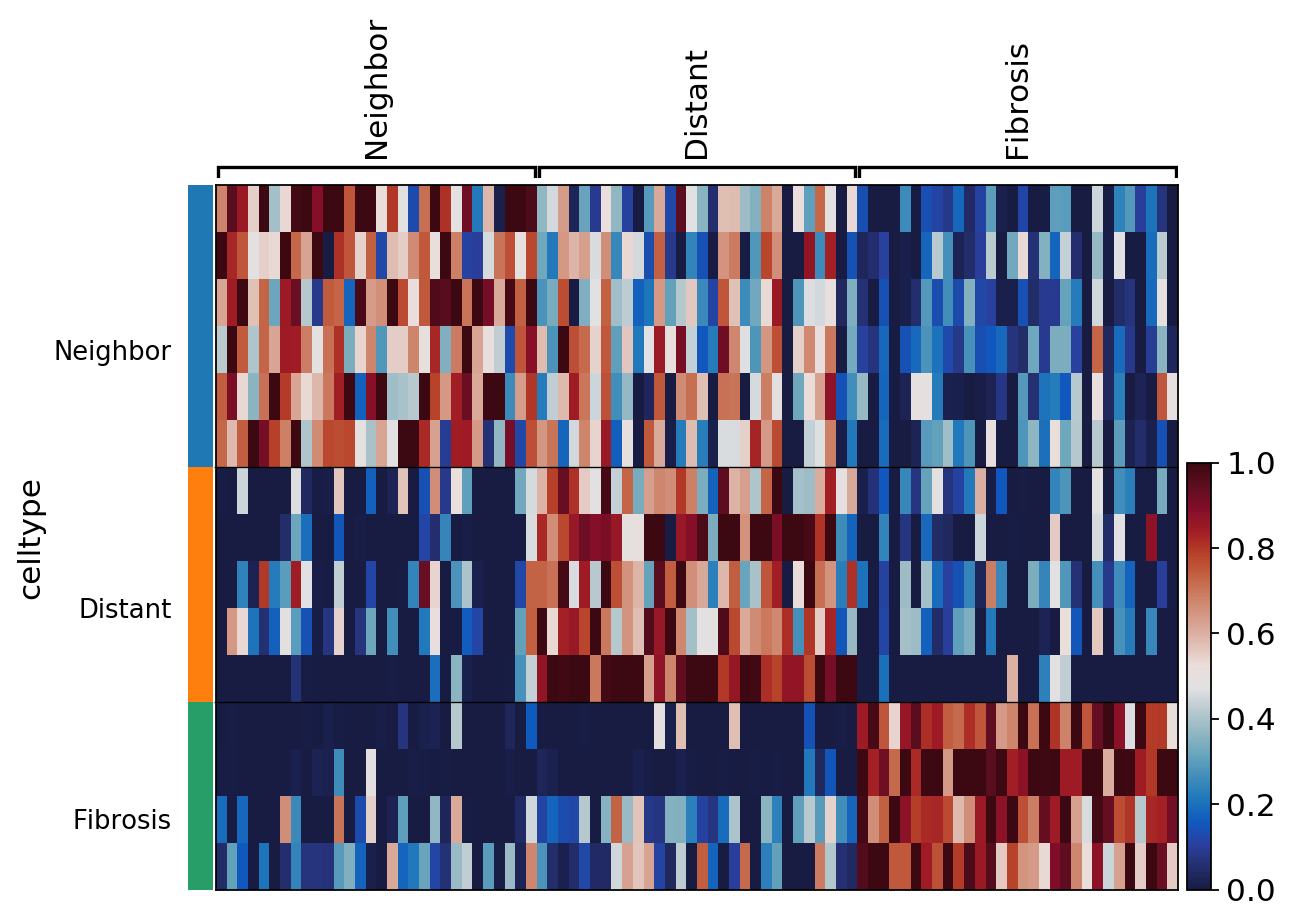

In [86]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='t-test_overestim_var')
sc.pl.rank_genes_groups_heatmap(adata,n_genes=30,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)